In [2]:
import pandas as pd
import numpy as np
import math
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import missingno as msno

import random
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import DBSCAN

import os

os.chdir('D:\\Category\\Study\\Jeju data') # Need large memory
print(os.getcwd())

D:\Category\Study\Jeju data


In [4]:
data = pd.read_csv('201901-202003.csv')
data

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3
...,...,...,...,...,...,...,...,...,...,...,...,...
24697787,202003,충북,충주시,휴양콘도 운영업,충북,충주시,30s,1,2,3,43300,4
24697788,202003,충북,충주시,휴양콘도 운영업,충북,충주시,40s,1,3,3,35000,3
24697789,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50s,1,4,4,188000,6
24697790,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50s,2,4,4,99000,6


In [5]:
april = pd.read_csv('202004.csv')
data_april = pd.merge(data, april, how='outer')
data_april

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3
...,...,...,...,...,...,...,...,...,...,...,...,...
26048109,202004,충북,충주시,휴양콘도 운영업,충북,충주시,20s,1,1,5,77000,5
26048110,202004,충북,충주시,휴양콘도 운영업,충북,충주시,30s,1,2,6,92000,6
26048111,202004,충북,충주시,휴양콘도 운영업,충북,충주시,40s,2,3,5,193000,5
26048112,202004,충북,충주시,휴양콘도 운영업,충북,충주시,50s,1,4,5,86000,7


In [6]:
submission = pd.read_csv('submission.csv')
submission

,id,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,0,202004,강원,건강보조식품 소매업,0
1,1,202004,강원,골프장 운영업,0
2,2,202004,강원,과실 및 채소 소매업,0
3,3,202004,강원,관광 민예품 및 선물용품 소매업,0
4,4,202004,강원,그외 기타 분류안된 오락관련 서비스업,0
...,...,...,...,...,...
1389,1389,202007,충북,피자 햄버거 샌드위치 및 유사 음식점업,0
1390,1390,202007,충북,한식 음식점업,0
1391,1391,202007,충북,호텔업,0
1392,1392,202007,충북,화장품 및 방향제 소매업,0


# Not one person's transaction!!!
## It's already a result of summation In perspective of stores!
REG_YYMM :년월\
CARD_SIDO_NM : 카드이용지역_시도 (가맹점 주소 기준)\
CARD_CCG_NM : 카드이용지역_시군구 (가맹점 주소 기준)\
STD_CLSS_NM : 업종명\
HOM_SIDO_NM : 거주지역_시도 (고객 집주소 기준)\
HOM_CCG_NM : 거주지역_시군구 (고객 집주소 기준)\
AGE: 연령대\
SEX_CTGO_CD : 성별 (1: 남성, 2: 여성)\
FLC : 가구생애주기 (1: 1인가구, 2: 영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가구, 5: 노년가구)\
CSTMR_CNT : 이용고객수 (명)\
AMT : 이용금액 (원) - 종속변수\
CNT : 이용건수 (건)

# Data check

In [ ]:
data.isna().sum()

REG_YYMM             0
CARD_SIDO_NM         0
CARD_CCG_NM      87213
STD_CLSS_NM          0
HOM_SIDO_NM          0
HOM_CCG_NM      147787
AGE                  0
SEX_CTGO_CD          0
FLC                  0
CSTMR_CNT            0
AMT                  0
CNT                  0
dtype: int64

# New variable

## 1) year month

In [7]:
data['month'] = data.REG_YYMM % 100
data['year'] = (data.REG_YYMM > 202000) + 2019

## 2) Log(AMT + 1)

In [8]:
data['lamt'] = np.log1p(data['AMT'])
data['lamt']

0           12.648194
1           14.133601
2           13.615474
3           14.356090
4           13.861727
              ...    
24697787    10.675931
24697788    10.463132
24697789    12.144203
24697790    11.502885
24697791    12.175619
Name: lamt, Length: 24697792, dtype: float64

## 3) (201901 ~ 201903) vs (202001~202003)

In [9]:
idx_123 = (data.REG_YYMM == 201901) | (data.REG_YYMM == 201902) | (data.REG_YYMM == 201903) | (data.REG_YYMM == 202001) | (data.REG_YYMM == 202002) | (data.REG_YYMM == 202003)
data_123 = data[idx_123]

# Time series

In [11]:
ts = data.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum()['AMT'].reset_index() # lamt는 exp에서 inf됨
ts

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,201901,강원,건강보조식품 소매업,148354746
1,201901,강원,골프장 운영업,1229200312
2,201901,강원,과실 및 채소 소매업,1286979106
3,201901,강원,관광 민예품 및 선물용품 소매업,30656770
4,201901,강원,그외 기타 스포츠시설 운영업,13101500
...,...,...,...,...
9433,202003,충북,피자 햄버거 샌드위치 및 유사 음식점업,1315245299
9434,202003,충북,한식 음식점업,16152482704
9435,202003,충북,호텔업,15248550
9436,202003,충북,화장품 및 방향제 소매업,428881434


In [12]:
ts['month'] = ts.REG_YYMM % 100
ts['year'] = (ts.REG_YYMM > 202000) + 2019

for i in range(ts.shape[0]):
  ts.loc[i, 'date'] = datetime.date(ts.year[i], ts.month[i], 1)

ts

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT,month,year,date
0,201901,강원,건강보조식품 소매업,148354746,1,2019,2019-01-01
1,201901,강원,골프장 운영업,1229200312,1,2019,2019-01-01
2,201901,강원,과실 및 채소 소매업,1286979106,1,2019,2019-01-01
3,201901,강원,관광 민예품 및 선물용품 소매업,30656770,1,2019,2019-01-01
4,201901,강원,그외 기타 스포츠시설 운영업,13101500,1,2019,2019-01-01
...,...,...,...,...,...,...,...
9433,202003,충북,피자 햄버거 샌드위치 및 유사 음식점업,1315245299,3,2020,2020-03-01
9434,202003,충북,한식 음식점업,16152482704,3,2020,2020-03-01
9435,202003,충북,호텔업,15248550,3,2020,2020-03-01
9436,202003,충북,화장품 및 방향제 소매업,428881434,3,2020,2020-03-01


# example Jeju

In [13]:
# Test on Jeju
jeju = ts[(ts.CARD_SIDO_NM == '제주') & (ts.STD_CLSS_NM=='한식 음식점업')].set_index('date')
jeju

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT,month,year
date,,,,,,
2019-01-01,201901,제주,한식 음식점업,20891290808,1,2019
2019-02-01,201902,제주,한식 음식점업,18175785175,2,2019
2019-03-01,201903,제주,한식 음식점업,20571767495,3,2019
2019-04-01,201904,제주,한식 음식점업,20400616056,4,2019
2019-05-01,201905,제주,한식 음식점업,21924273734,5,2019
2019-06-01,201906,제주,한식 음식점업,21352835062,6,2019
2019-07-01,201907,제주,한식 음식점업,22167880780,7,2019
2019-08-01,201908,제주,한식 음식점업,24988519032,8,2019
2019-09-01,201909,제주,한식 음식점업,19267437970,9,2019


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


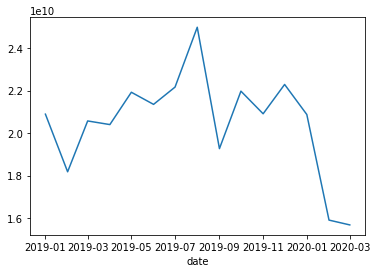

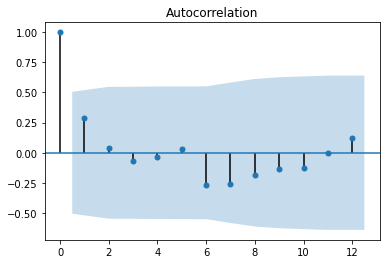

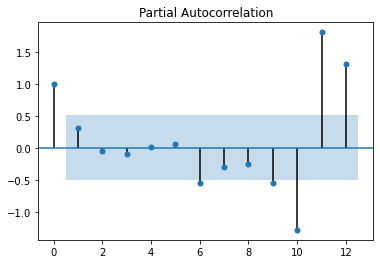

In [8]:
jeju['AMT'].plot()
plot_acf(jeju['AMT'])
plot_pacf(jeju['AMT'])
plt.show()
# ACF를 보면 3의 Time lag를 기준으로 자기상관이 양에서 음으로 변동한다.
# PACF는 1의 Time lag에서부터 무의하다.
# 따라서 (p=0, q=0)이 적당하다고 추측할 수 있다.

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


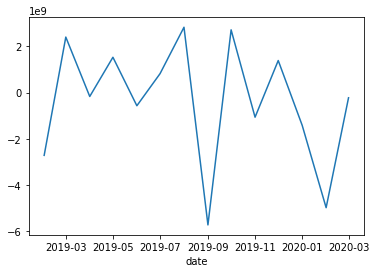

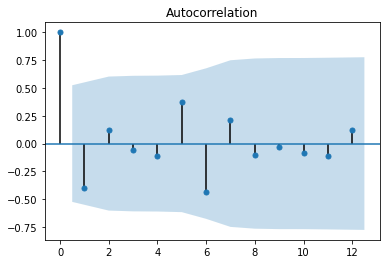

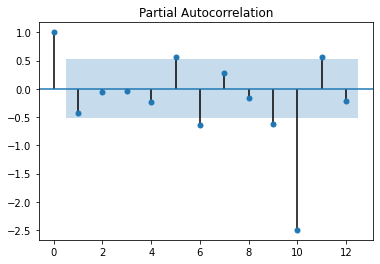

In [ ]:
diff_1=jeju['AMT'].diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()
# 차분이후의 ACF와 PACF를 보니, 시계열이 정상상태(Stationary)를 보이는것으로 생각되므로, 1차차분 만으로 충분할것같다.

In [14]:
model = ARIMA(jeju['AMT'], order=(1, 0, 0)) # 0,0,5 is also significant!!!
model_fit = model.fit(trend='nc',full_output=True, disp=1)# trend='c': constant is not significant. -> nc
print(model_fit.summary())

C:\Users\raise\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                    AMT   No. Observations:                   15
Model:                     ARMA(1, 0)   Log Likelihood                -348.379
Method:                       css-mle   S.D. of innovations     2588404913.933
Date:                Tue, 08 Sep 2020   AIC                            700.758
Time:                        19:53:01   BIC                            702.174
Sample:                    01-01-2019   HQIC                           700.743
                         - 03-01-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.AMT      0.9904      0.013     76.400      0.000       0.965       1.016
                                    Roots                                    
                  Real          Imaginary           M

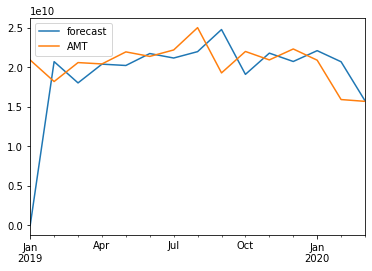

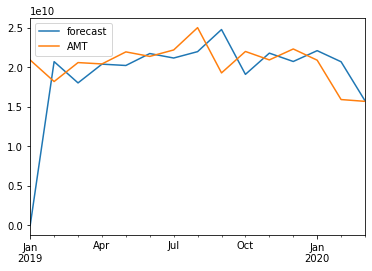

In [13]:
model_fit.plot_predict()
# It looks like the prediction is one month ahead

In [20]:
fore = pd.DataFrame(model_fit.forecast(steps=5))
fore

,0,1,2,3,4
0,0.449244,0.350002,0.272683,0.212445,0.165514
1,0.392606,0.497694,0.551805,0.582201,0.599901
2,"[-0.32024876976063055, 1.21873762132984]","[-0.6254597956026967, 1.3254641344204736]","[-0.8088336881174832, 1.3542005822174135]","[-0.9286484084073279, 1.3535387022053915]","[-1.0102700278708212, 1.3412981187155235]"


In [ ]:
fore.iloc[0, [0, 3]]

0    1.87108e+10
3    2.04012e+10
Name: 0, dtype: object

## predict all

In [38]:
# train set
CARD_SIDO_NMs = ts['CARD_SIDO_NM'].unique()
STD_CLSS_NMs  = ts['STD_CLSS_NM'].unique()
dates = ts['date'].unique()

temp = []
for CARD_SIDO_NM in CARD_SIDO_NMs:
  for STD_CLSS_NM in STD_CLSS_NMs:
    for date in dates:
      temp.append([CARD_SIDO_NM, STD_CLSS_NM, date])
temp = np.array(temp)
temp = pd.DataFrame(data=temp, columns=['CARD_SIDO_NM', 'STD_CLSS_NM', 'date'])

temp

,CARD_SIDO_NM,STD_CLSS_NM,date
0,강원,건강보조식품 소매업,2019-01-01
1,강원,건강보조식품 소매업,2019-02-01
2,강원,건강보조식품 소매업,2019-03-01
3,강원,건강보조식품 소매업,2019-04-01
4,강원,건강보조식품 소매업,2019-05-01
...,...,...,...
10450,충북,정기 항공 운송업,2019-11-01
10451,충북,정기 항공 운송업,2019-12-01
10452,충북,정기 항공 운송업,2020-01-01
10453,충북,정기 항공 운송업,2020-02-01


In [39]:
train = pd.merge(temp, ts, how='outer')

# train.fillna(0, inplace=True) # error
for i in range(train.shape[0]):
  if train['AMT'].isna()[i]:
    train.loc[i, 'AMT']= random.uniform(0.0, 1.0)
train.set_index('date', inplace=True)
train

,CARD_SIDO_NM,STD_CLSS_NM,REG_YYMM,AMT,month,year
date,,,,,,
2019-01-01,강원,건강보조식품 소매업,201901.0,1.483547e+08,1.0,2019.0
2019-02-01,강원,건강보조식품 소매업,201902.0,1.467159e+08,2.0,2019.0
2019-03-01,강원,건강보조식품 소매업,201903.0,1.094390e+08,3.0,2019.0
2019-04-01,강원,건강보조식품 소매업,201904.0,1.065485e+08,4.0,2019.0
2019-05-01,강원,건강보조식품 소매업,201905.0,1.481157e+08,5.0,2019.0
...,...,...,...,...,...,...
2019-11-01,충북,정기 항공 운송업,NaN,8.612937e-01,NaN,NaN
2019-12-01,충북,정기 항공 운송업,NaN,5.193265e-01,NaN,NaN
2020-01-01,충북,정기 항공 운송업,NaN,3.240156e-01,NaN,NaN


In [40]:
# prediction table
CARD_SIDO_NMs = ts['CARD_SIDO_NM'].unique()
STD_CLSS_NMs  = ts['STD_CLSS_NM'].unique()
years         = [2020]
months        = [4, 7]

temp = []
for year in years:
  for month in months:
    for CARD_SIDO_NM in CARD_SIDO_NMs:
      for STD_CLSS_NM in STD_CLSS_NMs:
        temp.append([year, month, CARD_SIDO_NM, STD_CLSS_NM])
temp = np.array(temp)
temp = pd.DataFrame(data=temp, columns=['year', 'month', 'CARD_SIDO_NM', 'STD_CLSS_NM'])

temp['AMT']=0
temp

,year,month,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,2020,4,강원,건강보조식품 소매업,0
1,2020,4,강원,골프장 운영업,0
2,2020,4,강원,과실 및 채소 소매업,0
3,2020,4,강원,관광 민예품 및 선물용품 소매업,0
4,2020,4,강원,그외 기타 스포츠시설 운영업,0
...,...,...,...,...,...
1389,2020,7,충북,호텔업,0
1390,2020,7,충북,화장품 및 방향제 소매업,0
1391,2020,7,충북,휴양콘도 운영업,0
1392,2020,7,충북,그외 기타 분류안된 오락관련 서비스업,0


In [41]:
for a in CARD_SIDO_NMs:
  for b in STD_CLSS_NMs:
    train_part = train[(train.CARD_SIDO_NM==a) & (train.STD_CLSS_NM==b)]

    model = ARIMA(train_part['AMT'], order=(1, 0, 0))
    model_fit = model.fit(trend='nc',full_output=True, disp=1)
    fore = pd.DataFrame(model_fit.forecast(steps=4))

    temp.loc[(temp.CARD_SIDO_NM==a) & (temp.STD_CLSS_NM==b) & (temp.month=='4'), 'AMT'] = fore.iloc[0, 0] # Must be temp.month=='4' Not temp.month==4
    temp.loc[(temp.CARD_SIDO_NM==a) & (temp.STD_CLSS_NM==b) & (temp.month=='7'), 'AMT'] = fore.iloc[0, 3]

temp

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-

,year,month,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,2020,4,강원,건강보조식품 소매업,8.622181e+07
1,2020,4,강원,골프장 운영업,2.667996e+09
2,2020,4,강원,과실 및 채소 소매업,9.621086e+08
3,2020,4,강원,관광 민예품 및 선물용품 소매업,1.139285e+07
4,2020,4,강원,그외 기타 스포츠시설 운영업,1.999487e+06
...,...,...,...,...,...
1389,2020,7,충북,호텔업,1.158259e+07
1390,2020,7,충북,화장품 및 방향제 소매업,4.233045e+08
1391,2020,7,충북,휴양콘도 운영업,3.383789e+06
1392,2020,7,충북,그외 기타 분류안된 오락관련 서비스업,3.517805e-01


In [31]:
temp.loc[temp.month=='4', 'REG_YYMM']=202004
temp.loc[temp.month=='7', 'REG_YYMM']=202007
temp = temp[['REG_YYMM', 'CARD_SIDO_NM',	'STD_CLSS_NM', 'AMT']]

submission = pd.read_csv('submission.csv', index_col=0)
submission.drop('AMT', axis=1, inplace=True)
result = pd.merge(submission, temp, how='left') # Without how='left', it doubles!!!
result.index.names=['id']

result.to_csv('result.csv', encoding='utf-8-sig')
result

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
id,,,,
0,202004,강원,건강보조식품 소매업,7.739201e+07
1,202004,강원,골프장 운영업,2.441254e+09
2,202004,강원,과실 및 채소 소매업,9.304757e+08
3,202004,강원,관광 민예품 및 선물용품 소매업,9.746496e+06
4,202004,강원,그외 기타 분류안된 오락관련 서비스업,2.079853e-11
...,...,...,...,...
1389,202007,충북,피자 햄버거 샌드위치 및 유사 음식점업,1.296692e+09
1390,202007,충북,한식 음식점업,1.564891e+10
1391,202007,충북,호텔업,1.081310e+07


# Clustering
Use 201901 ~ 202004 to group 
* CARD_SIDO_NM	& STD_CLSS_NM is not significant
* Only AMT
* Only SIDO
* Only STD_CLSS_NM

In [54]:
clus = data_april[['REG_YYMM', 'STD_CLSS_NM', 'AMT']].groupby(['REG_YYMM', 'STD_CLSS_NM']).sum().reset_index()
clus

,REG_YYMM,STD_CLSS_NM,AMT
0,201901,건강보조식품 소매업,8605074944
1,201901,골프장 운영업,11968748603
2,201901,과실 및 채소 소매업,44453112689
3,201901,관광 민예품 및 선물용품 소매업,955750428
4,201901,그외 기타 분류안된 오락관련 서비스업,1017500
...,...,...,...
651,202004,피자 햄버거 샌드위치 및 유사 음식점업,68034881566
652,202004,한식 음식점업,757519648644
653,202004,호텔업,4998634597
654,202004,화장품 및 방향제 소매업,32220012429


In [57]:
# 201901~202004
days = pd.DataFrame({'REG_YYMM': clus.REG_YYMM.unique()})
loc_clss = pd.DataFrame({'clss': clus.STD_CLSS_NM.unique(),
                         '1901': 0.0, '1902': 0.0, '1903':0.0, '1904':0.0, '1905':0.0, '1906':0.0, '1907':0.0, '1908':0.0, '1909':0.0, '1910':0.0, '1911':0.0, '1912':0.0,
                        '2001': 0.0, '2002':0.0, '2003':0.0, '2004':0.0})
loc_clss.set_index('clss', inplace=True)

for i in clus.STD_CLSS_NM.unique():
  tmp = clus[clus.STD_CLSS_NM==i]
  tmp['samt'] = StandardScaler().fit_transform(tmp.drop(['REG_YYMM', 'STD_CLSS_NM'], axis=1))
  tmp = pd.merge(days, tmp, how='outer')
  tmp.fillna(0, inplace=True)
  loc_clss.loc[i, :] = list(tmp.T.loc['samt', ])

loc_clss

C:\Users\raise\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\raise\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\raise\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

C:\Users\raise\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\raise\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\raise\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,2001,2002,2003,2004
clss,,,,,,,,,,,,,,,,
건강보조식품 소매업,1.119623,0.510153,-0.420444,-0.499732,0.667460,-0.468823,-0.752880,-0.743714,1.937455,0.207069,-0.527147,-0.739890,2.310226,-1.069274,-0.791995,-0.738086
골프장 운영업,-1.646253,-1.405272,0.081406,0.625101,1.196402,1.153735,0.625636,0.369645,0.417446,1.122667,0.572490,-1.026828,-1.563405,-1.287420,-0.073940,0.838588
과실 및 채소 소매업,0.542344,-0.073520,-0.606824,-0.699296,-0.284296,-0.762633,-1.309639,-0.488122,1.528817,-0.232608,0.040232,-0.152683,2.666309,-1.312291,0.168920,0.975290
관광 민예품 및 선물용품 소매업,-0.102460,-0.555427,0.133342,0.567250,0.924720,0.362158,-0.132498,0.857901,-0.356129,0.717202,1.766438,0.958885,-0.004521,-1.707502,-1.964515,-1.464842
그외 기타 분류안된 오락관련 서비스업,-0.956032,-0.145610,-0.262006,-0.304505,0.036888,0.643107,0.597707,2.616070,1.381843,1.171001,-0.749299,-0.970432,-0.694122,-0.701568,-0.560760,-1.102283
그외 기타 스포츠시설 운영업,1.876410,1.252081,0.822910,-0.394479,0.081278,0.345712,0.095187,0.971806,-0.200592,-0.359818,-0.813517,0.061727,0.833521,-0.949820,-1.865241,-1.757165
그외 기타 종합 소매업,1.062556,-0.685375,-1.078715,-1.424566,0.031682,-1.100643,-0.987469,-0.198920,1.498228,-0.326853,0.637394,0.485758,1.914347,-1.181592,0.746436,0.607731
기타 대형 종합 소매업,1.297011,0.016194,0.791265,0.262358,0.965590,-0.302177,0.497369,0.192811,0.705907,0.065202,-0.303724,0.589824,0.793238,-2.349586,-1.481141,-1.740139
기타 수상오락 서비스업,0.532493,-0.131348,0.054881,-0.061149,0.994702,0.892727,1.189148,2.076943,0.601244,-0.162492,-1.108567,-0.905396,-0.498986,-1.934677,-1.301130,-0.238392


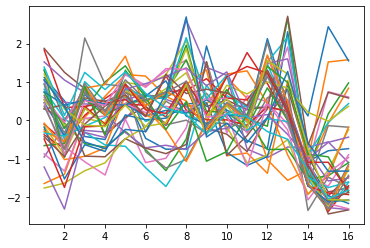

In [98]:
loc_clss.reset_index().drop('clss')

for i in range(loc_clss.shape[0]):
    plt.plot(np.arange(1,17), loc_clss.loc[i, ])

In [103]:
model_clus = DBSCAN(eps=3.6, min_samples=2)
pred = pd.DataFrame(model_clus.fit_predict(loc_clss))
pred.columns=['cluster']
pred.groupby('cluster').size()
# Using cluster is not a good idea.

cluster
0    39
1     2
dtype: int64

# Use 1 month before or 1 year before?

In [ ]:
tmp3 = data[(data.month==3) & (data.year==True)].groupby(['CARD_SIDO_NM', 'STD_CLSS_NM'])['AMT'].sum().reset_index()
tmp3.rename({'AMT':'202003_AMT'}, axis='columns', inplace=True)
tmp3

,CARD_SIDO_NM,STD_CLSS_NM,202003_AMT
0,강원,건강보조식품 소매업,96059012
1,강원,골프장 운영업,2915797995
2,강원,과실 및 채소 소매업,994816943
3,강원,관광 민예품 및 선물용품 소매업,13317300
4,강원,그외 기타 스포츠시설 운영업,2075000
...,...,...,...
604,충북,피자 햄버거 샌드위치 및 유사 음식점업,1315245299
605,충북,한식 음식점업,16152482704
606,충북,호텔업,15248550
607,충북,화장품 및 방향제 소매업,428881434


In [ ]:
tmp2 = data[(data.month==2) & (data.year==True)].groupby(['CARD_SIDO_NM', 'STD_CLSS_NM'])['AMT'].sum().reset_index()
tmp2.rename({'AMT':'202002_AMT'}, axis='columns', inplace=True)
tmp2

,CARD_SIDO_NM,STD_CLSS_NM,202002_AMT
0,강원,건강보조식품 소매업,76505561
1,강원,골프장 운영업,968456455
2,강원,과실 및 채소 소매업,867214360
3,강원,관광 민예품 및 선물용품 소매업,16375500
4,강원,그외 기타 스포츠시설 운영업,5065100
...,...,...,...
618,충북,피자 햄버거 샌드위치 및 유사 음식점업,1192384613
619,충북,한식 음식점업,17338883142
620,충북,호텔업,11516930
621,충북,화장품 및 방향제 소매업,495012925


In [ ]:
tmp3_9 = data[(data.month==3) & (data.year==False)].groupby(['CARD_SIDO_NM', 'STD_CLSS_NM'])['AMT'].sum().reset_index()
tmp3_9.rename({'AMT':'201903_AMT'}, axis='columns', inplace=True)
tmp3_9

,CARD_SIDO_NM,STD_CLSS_NM,201903_AMT
0,강원,건강보조식품 소매업,109439025
1,강원,골프장 운영업,2760497139
2,강원,과실 및 채소 소매업,939227950
3,강원,관광 민예품 및 선물용품 소매업,25023190
4,강원,그외 기타 스포츠시설 운영업,6817720
...,...,...,...
625,충북,피자 햄버거 샌드위치 및 유사 음식점업,1441131811
626,충북,한식 음식점업,22952482750
627,충북,호텔업,36030010
628,충북,화장품 및 방향제 소매업,729328422


In [ ]:
tmp23 = pd.merge(tmp2, tmp3) # 603 rows
tmp23_9 = pd.merge(tmp23, tmp3_9) # 602 rows

print(((tmp23_9['202003_AMT']-tmp23_9['202002_AMT'])**2).sum())
print(((tmp23_9['202003_AMT']-tmp23_9['201903_AMT'])**2).sum())
# 1 month before is better!

3578674070286986157
7621616352011351151


# Bayesian

## 1) Distribution of overall AMT

<Figure size 432x288 with 0 Axes>

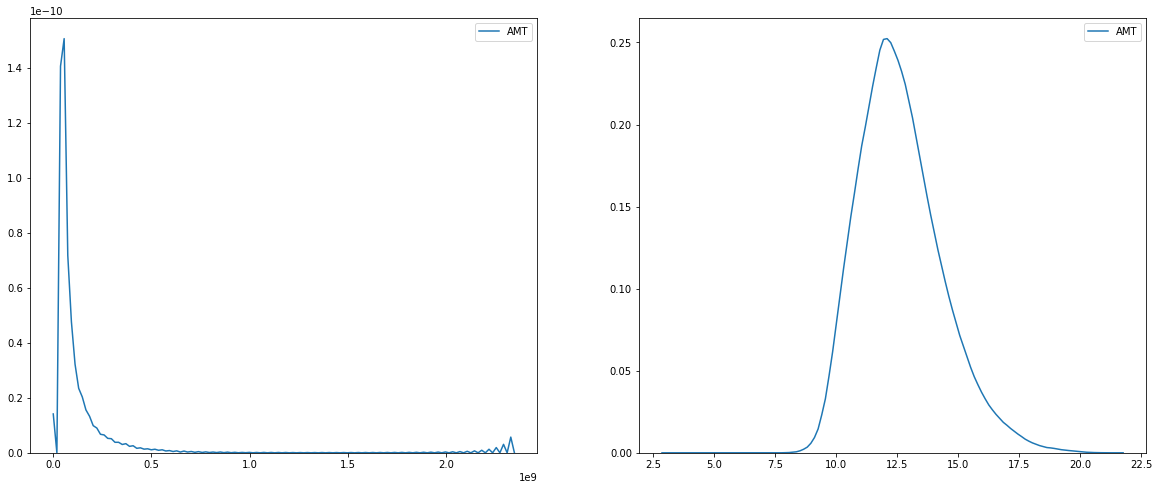

In [9]:
plt.figure()
fig, ax = plt.subplots(1, 2, figsize=(19, 7))

plt.subplot(1,2,1)
sns.kdeplot(data_april['AMT']) # Should be divided into two groups?

plt.subplot(1,2,2)
sns.kdeplot(np.log1p(data_april['AMT'])) # Maybe not necessary.

## 2) Distribution of AMT where (201901 ~ 201904) vs (202001 ~ 202004)

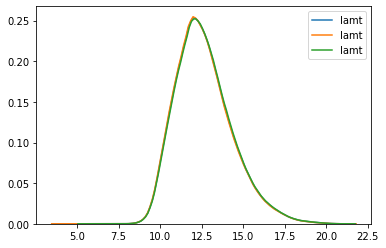

In [ ]:
# 1234 overall vs 2019 vs 2020
sns.kdeplot(data_123['lamt'])
sns.kdeplot(data_123.loc[data_123.year==0, 'lamt'])
sns.kdeplot(data_123.loc[data_123.year==1, 'lamt'])

# No difference???
# In perspective of new clients, this result means decrease.

<Figure size 432x288 with 0 Axes>

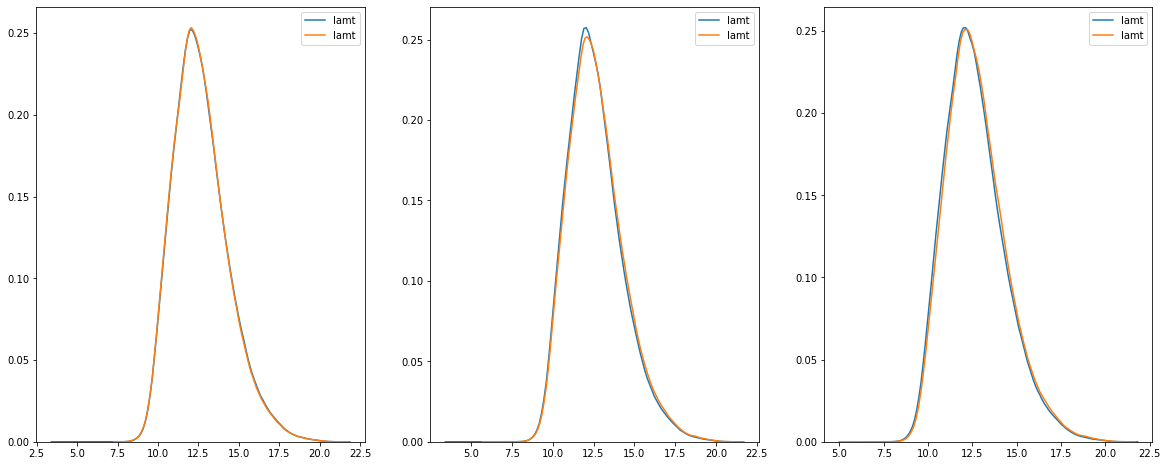

In [ ]:
# 1, 2, 3 month each
plt.figure()
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

for i in range(3):
  plt.subplot(1,3,i+1)
  sns.kdeplot(data_123.loc[(data_123.year==0) & (data_123.month==i+1), 'lamt'])
  sns.kdeplot(data_123.loc[(data_123.year==1) & (data_123.month==i+1), 'lamt'])

# Also no difference.

# April prediction
* 201904 prior
* 202003 data

<Figure size 432x288 with 0 Axes>

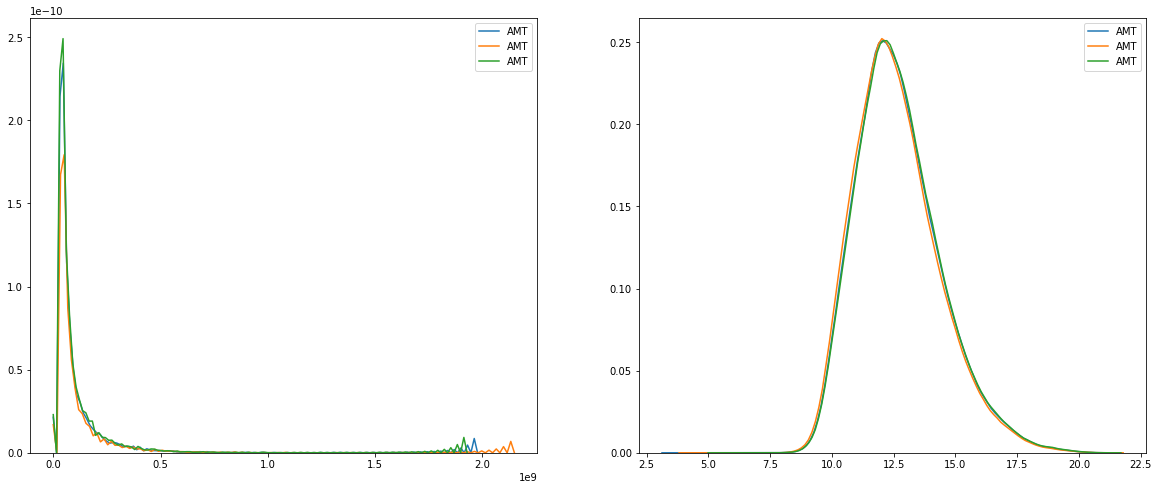

In [14]:
last_april = data.loc[data.REG_YYMM==201904, ]
this_march = data.loc[data.REG_YYMM==202003, ]

plt.figure()
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

plt.subplot(1,2, 1)
sns.kdeplot(april.AMT)
sns.kdeplot(last_april.AMT)
sns.kdeplot(this_march.AMT)

plt.subplot(1,2, 2)
sns.kdeplot(np.log1p(april.AMT))
sns.kdeplot(np.log1p(last_april.AMT))
sns.kdeplot(np.log1p(this_march.AMT))

In [23]:
data.STD_CLSS_NM.unique()

array(['건강보조식품 소매업', '골프장 운영업', '과실 및 채소 소매업', '관광 민예품 및 선물용품 소매업',
       '그외 기타 스포츠시설 운영업', '그외 기타 종합 소매업', '기타 대형 종합 소매업', '기타 외국식 음식점업',
       '기타 주점업', '기타음식료품위주종합소매업', '마사지업', '비알콜 음료점업', '빵 및 과자류 소매업',
       '서양식 음식점업', '수산물 소매업', '슈퍼마켓', '스포츠 및 레크레이션 용품 임대업', '여관업', '욕탕업',
       '육류 소매업', '일반유흥 주점업', '일식 음식점업', '전시 및 행사 대행업', '중식 음식점업',
       '차량용 가스 충전업', '차량용 주유소 운영업', '체인화 편의점', '피자 햄버거 샌드위치 및 유사 음식점업',
       '한식 음식점업', '호텔업', '화장품 및 방향제 소매업', '휴양콘도 운영업', '여행사업', '자동차 임대업',
       '면세점', '버스 운송업', '택시 운송업', '기타 수상오락 서비스업', '내항 여객 운송업',
       '그외 기타 분류안된 오락관련 서비스업', '정기 항공 운송업'], dtype=object)

In [25]:
this_april_spec.AMT

Series([], Name: AMT, dtype: int64)

<Figure size 432x288 with 0 Axes>

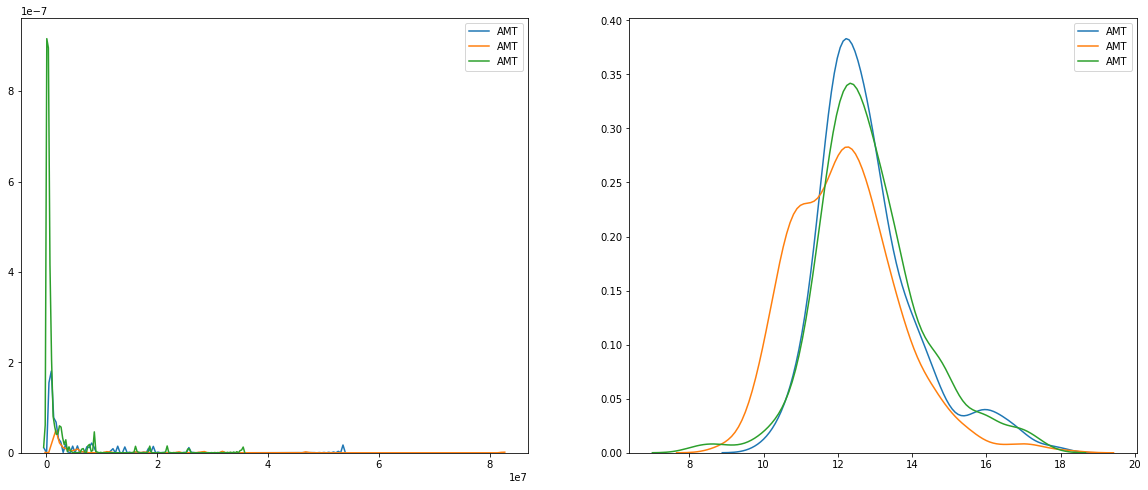

In [26]:
last_april_spec = data.loc[(data.REG_YYMM==201904) & (data.CARD_SIDO_NM=='제주') & (data.STD_CLSS_NM=='여관업'), ]
this_march_spec = data.loc[(data.REG_YYMM==202003) & (data.CARD_SIDO_NM=='제주') & (data.STD_CLSS_NM=='여관업'), ]
this_april_spec = april.loc[(april.CARD_SIDO_NM=='제주') & (april.STD_CLSS_NM=='여관업'), ]

plt.figure()
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

plt.subplot(1,2, 1)
sns.kdeplot(this_april_spec.AMT)
sns.kdeplot(last_april_spec.AMT)
sns.kdeplot(this_march_spec.AMT)

plt.subplot(1,2, 2)
sns.kdeplot(np.log1p(this_april_spec.AMT))
sns.kdeplot(np.log1p(last_april_spec.AMT))
sns.kdeplot(np.log1p(this_march_spec.AMT))

# 왜 로그를 씌운 것과 안 씌운 것의 순위가 다르지?

# Junly prediction
* 201907 prior
* 202004 data

<Figure size 432x288 with 0 Axes>

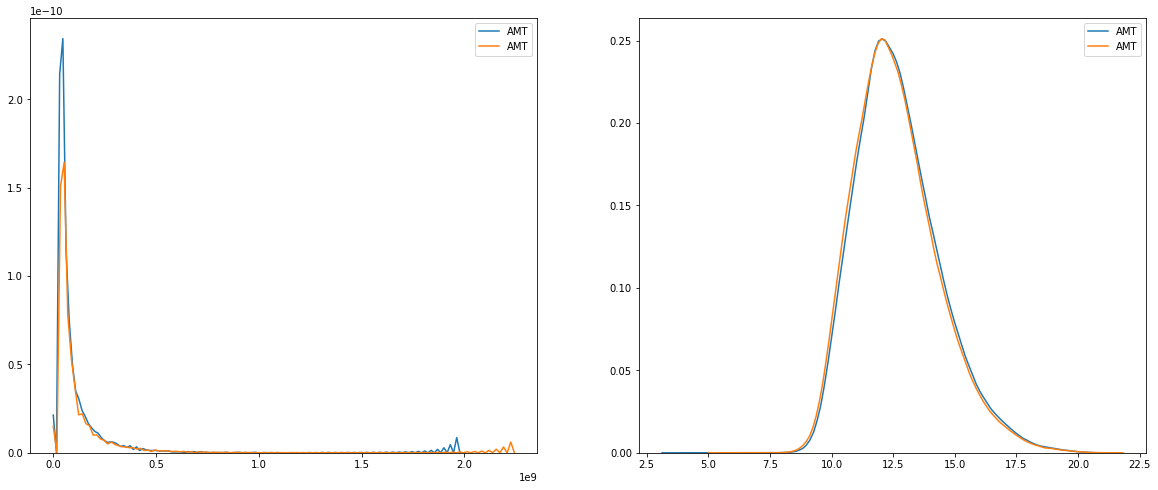

In [15]:
last_junly = data.loc[data.REG_YYMM==201907, ]

plt.figure()
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

plt.subplot(1,2, 1)
sns.kdeplot(april.AMT)
sns.kdeplot(last_junly.AMT)

plt.subplot(1,2, 2)
sns.kdeplot(np.log1p(april.AMT))
sns.kdeplot(np.log1p(last_junly.AMT))

# AGE & FLC

In [ ]:
# AGE distiribution for each FLC
data.groupby('FLC')['AGE'].value_counts()

FLC  AGE
1    20s    4235144
     30s     976322
     10s     314674
2    30s    4254431
     40s    1074248
     20s     856531
     50s       3591
3    40s    3543593
     30s     319766
     50s     191382
4    50s    4260714
     40s    1184606
5    60s    2606168
     70s     876622
Name: AGE, dtype: int64

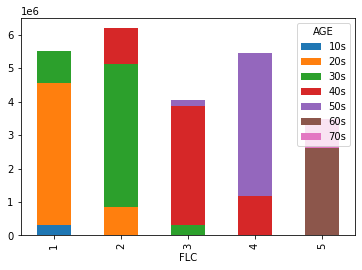

In [ ]:
data.groupby('FLC')['AGE'].value_counts().unstack(level=1).plot.bar(stacked=True)
# Has high correlation!
# We can think of interaction variable.
# But FLC is maybe a estimated variable.

# CSTMR_CNT & CNT

,REG_YYMM,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
REG_YYMM,1.000000,-0.009399,-0.005525,0.001432,0.003167,0.002144
SEX_CTGO_CD,-0.009399,1.000000,-0.023134,0.008258,-0.005424,0.000469
FLC,-0.005525,-0.023134,1.000000,0.006774,0.041099,-0.001011
CSTMR_CNT,0.001432,0.008258,0.006774,1.000000,0.866339,0.930356
AMT,0.003167,-0.005424,0.041099,0.866339,1.000000,0.778102
CNT,0.002144,0.000469,-0.001011,0.930356,0.778102,1.000000


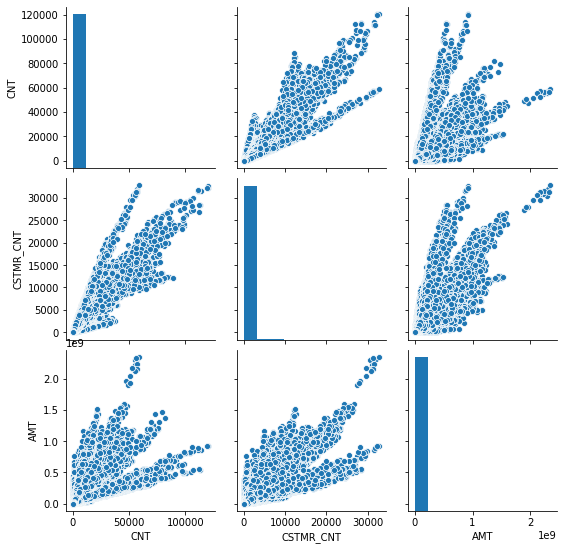

In [ ]:
data.corr()
sns.pairplot(data[['CNT', 'CSTMR_CNT', 'AMT']])
# CSTMR_CNT has higher relationship than CNT has.

# PCA of CNT & CSTMR_CNT

In [ ]:
cnts = data[['CNT', 'CSTMR_CNT']]
cnts = StandardScaler().fit_transform(cnts) # Scaling
cnts = pd.DataFrame(cnts)

#PCA
pca = PCA(n_components=2)
cnts = pca.fit_transform(cnts)
cnts = pd.DataFrame(cnts)
pd.DataFrame({"cnts1":cnts[0], "cnts2":cnts[1], "AMT":data['AMT']}).corr()

# CSTMR_CNT가 두 주성분보다 더 높은 correlation with AMT

,cnts1,cnts2,AMT
cnts1,1.000000e+00,1.958676e-12,0.836921
cnts2,1.958676e-12,1.000000e+00,-0.236424
AMT,8.369209e-01,-2.364242e-01,1.000000


# 재방문률

In [ ]:
data['re_visit']=1 - data['CSTMR_CNT']/data['CNT']
data[['REG_YYMM',	'CARD_SIDO_NM',	'STD_CLSS_NM', 're_visit', 'AMT']]

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,re_visit,AMT
0,201901,강원,건강보조식품 소매업,0.000000,311200
1,201901,강원,건강보조식품 소매업,0.125000,1374500
2,201901,강원,건강보조식품 소매업,0.000000,818700
3,201901,강원,건강보조식품 소매업,0.200000,1717000
4,201901,강원,건강보조식품 소매업,0.000000,1047300
...,...,...,...,...,...
24697787,202003,충북,휴양콘도 운영업,0.250000,43300
24697788,202003,충북,휴양콘도 운영업,0.000000,35000
24697789,202003,충북,휴양콘도 운영업,0.333333,188000
24697790,202003,충북,휴양콘도 운영업,0.333333,99000


In [ ]:
data[['re_visit', 'AMT']].corr()

,re_visit,AMT
re_visit,1.000000,0.095039
AMT,0.095039,1.000000


In [ ]:
print(len(data.CARD_SIDO_NM.unique()))
print(len(data.STD_CLSS_NM.unique()))

17
41


In [ ]:
df = data.copy()
df = df[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
df.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum()

AMT
REG_YYMM CARD_SIDO_NM STD_CLSS_NM                       
201901   강원           건강보조식품 소매업               148354746
                      골프장 운영업                 1229200312
                      과실 및 채소 소매업             1286979106
                      관광 민예품 및 선물용품 소매업         30656770
                      그외 기타 스포츠시설 운영업           13101500
...                                                  ...
202003   충북           피자 햄버거 샌드위치 및 유사 음식점업   1315245299
                      한식 음식점업                16152482704
                      호텔업                       15248550
                      화장품 및 방향제 소매업            428881434
                      휴양콘도 운영업                  12733490

[9438 rows x 1 columns]

In [ ]:
df = df.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(drop=False)
df

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,201901,강원,건강보조식품 소매업,148354746
1,201901,강원,골프장 운영업,1229200312
2,201901,강원,과실 및 채소 소매업,1286979106
3,201901,강원,관광 민예품 및 선물용품 소매업,30656770
4,201901,강원,그외 기타 스포츠시설 운영업,13101500
...,...,...,...,...
9433,202003,충북,피자 햄버거 샌드위치 및 유사 음식점업,1315245299
9434,202003,충북,한식 음식점업,16152482704
9435,202003,충북,호텔업,15248550
9436,202003,충북,화장품 및 방향제 소매업,428881434


# 부분 시각화

In [ ]:
tmp = df[(df.CARD_SIDO_NM=='강원') & (df.STD_CLSS_NM=='건강보조식품 소매업')]
tmp = tmp.reset_index(drop=True)
tmp

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,201901,강원,건강보조식품 소매업,148354746
1,201902,강원,건강보조식품 소매업,146715871
2,201903,강원,건강보조식품 소매업,109439025
3,201904,강원,건강보조식품 소매업,106548473
4,201905,강원,건강보조식품 소매업,148115738
5,201906,강원,건강보조식품 소매업,97960089
6,201907,강원,건강보조식품 소매업,92505731
7,201908,강원,건강보조식품 소매업,99023125
8,201909,강원,건강보조식품 소매업,205353608
9,201910,강원,건강보조식품 소매업,115917681


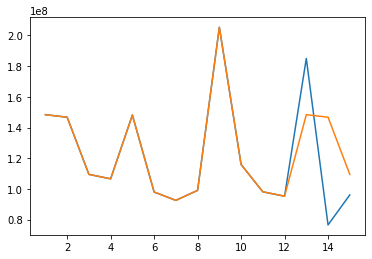

In [ ]:
plt.plot(np.arange(1,16), tmp['AMT']) # Completely different pattern!!!
plt.plot(np.arange(1,16), tmp.loc[[0,1,2,3,4,5,6,7,8,9,10,11,0,1,2], 'AMT']) # Without corona

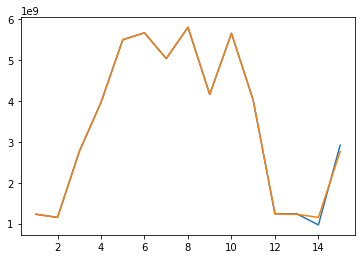

In [ ]:
tmp = df[(df.CARD_SIDO_NM=='강원') & (df.STD_CLSS_NM=='골프장 운영업')]
tmp = tmp.reset_index(drop=True)
plt.plot(np.arange(1,16), tmp['AMT']) # Completely different pattern!!!
plt.plot(np.arange(1,16), tmp.loc[[0,1,2,3,4,5,6,7,8,9,10,11,0,1,2], 'AMT']) # Without corona -> no effect!!!

In [ ]:
submission = pd.read_csv('submission.csv', index_col=0)
submission = submission[submission.REG_YYMM==202004]

location = submission.CARD_SIDO_NM.unique()
classes = submission.STD_CLSS_NM.unique()

In [ ]:
#df['dif']=0
ii=0

for i in location:
  jj=0
  for j in classes:
    a = np.repeat(np.nan, 15)
    tmp = df[(df.CARD_SIDO_NM== i) & (df.STD_CLSS_NM==j)].reset_index(drop=True)
    kk=0
    tt=0
    for k in [201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003]:
      if k in list(tmp.REG_YYMM):
        a[kk]=tmp.loc[tt, 'AMT'] # If there is nan, tmp size is not 15
        tt += 1
      kk +=1
    
    a = pd.DataFrame(a)
    a= a.interpolate(methods='linear', axis=1, limit_direction='both')
    
    tmp1 = a
    tmp2 = a.copy()

    mi = min(tmp1[0])
    ma = max(tmp1[0])
    tmp1 = (tmp1-mi)/(ma-mi)

    dif = np.mean(abs(np.array(tmp1.loc[[0,1,2],])-np.array(tmp1.loc[[12,13,14],])))

    idx = ii*41+jj
    #df.loc[idx, 'dif'] = dif    
    submission.loc[idx, 'AMT'] =  pd.DataFrame((1/(1-dif)/(1/dif+1/(1-dif)))*tmp2.loc[14, ] + (1/dif/(1/dif+1/(1-dif)))*tmp2.loc[3, ]).loc[0,0]

    jj += 1
  ii += 1

submission

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
id,,,,
0,202004,강원,건강보조식품 소매업,1.032855e+08
1,202004,강원,골프장 운영업,3.939490e+09
2,202004,강원,과실 및 채소 소매업,8.718892e+08
3,202004,강원,관광 민예품 및 선물용품 소매업,1.726928e+07
4,202004,강원,그외 기타 분류안된 오락관련 서비스업,NaN
...,...,...,...,...
692,202004,충북,피자 햄버거 샌드위치 및 유사 음식점업,1.396933e+09
693,202004,충북,한식 음식점업,2.002556e+10
694,202004,충북,호텔업,3.208679e+07


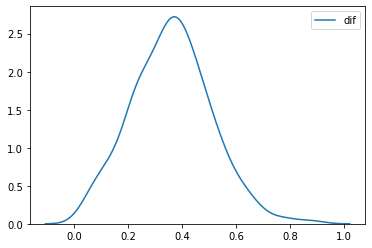

In [ ]:
sns.kdeplot(df.loc[range(697), 'dif'])

In [ ]:
submission1 = submission.fillna(0)

In [ ]:
submission = pd.read_csv('submission.csv', index_col=0)
submission = submission.loc[submission['REG_YYMM']==202004]
submission = submission[['CARD_SIDO_NM', 'STD_CLSS_NM']]
submission = submission.merge(submission1, left_on=['CARD_SIDO_NM', 'STD_CLSS_NM'], right_on=['CARD_SIDO_NM', 'STD_CLSS_NM'], how='left')

submission = submission.fillna(0)
AMT = list(submission['AMT'])*2
submission = pd.read_csv('submission.csv', index_col=0)
submission['AMT'] = AMT

submission = pd.read_csv('submission.csv', index_col=0)
submission['AMT'] = AMT
submission.to_csv('submission.csv', encoding='utf-8-sig')
submission.head()

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
id,,,,
0,202004,강원,건강보조식품 소매업,1.032855e+08
1,202004,강원,골프장 운영업,3.939490e+09
2,202004,강원,과실 및 채소 소매업,8.718892e+08
3,202004,강원,관광 민예품 및 선물용품 소매업,1.726928e+07
4,202004,강원,그외 기타 분류안된 오락관련 서비스업,0.000000e+00


# Age
The more young people there are, may the less the effect of corona is.

In [ ]:
data['AGE'].unique()

array(['20s', '30s', '40s', '50s', '60s', '70s', '10s'], dtype=object)

## 1) Compare The amount of age at (201901 ~ 201903) vs (202001~202003)

In [ ]:
data_age = data_123[['REG_YYMM', 'AGE', 'CSTMR_CNT', 'month', 'year', 'AMT']]
data_age[['REG_YYMM', 'AGE', 'CSTMR_CNT']].groupby(['REG_YYMM', 'AGE']).sum()

CSTMR_CNT
REG_YYMM AGE           
201901   10s     447129
         20s   17674632
         30s   22730608
         40s   23327264
         50s   21557520
         60s   10640892
         70s    2556076
201902   10s     527782
         20s   17077897
         30s   21500743
         40s   21908075
         50s   20099863
         60s    9765719
         70s    2287094
201903   10s     639216
         20s   19418388
         30s   23622470
         40s   24058761
         50s   22216324
         60s   11049781
         70s    2672083
202001   10s    1139527
         20s   19441191
         30s   21942655
         40s   23319089
         50s   21711952
         60s   10807391
         70s    2616189
202002   10s    1161692
         20s   16871217
         30s   18413864
         40s   19592165
         50s   18456828
         60s    8964482
         70s    2101270
202003   10s     882357
         20s   15216962
         30s   17793422
         40s   19011851
         50s   18501259
         60s    9175795
         70s    2181462

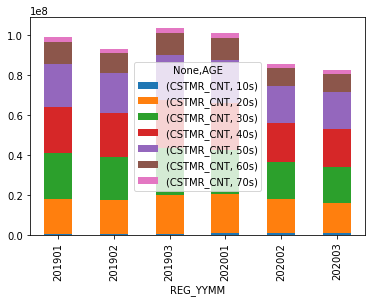

In [ ]:
data_age.groupby(['REG_YYMM', 'AGE']).sum().unstack(level=1).plot.bar(stacked=True)

<Figure size 432x288 with 0 Axes>

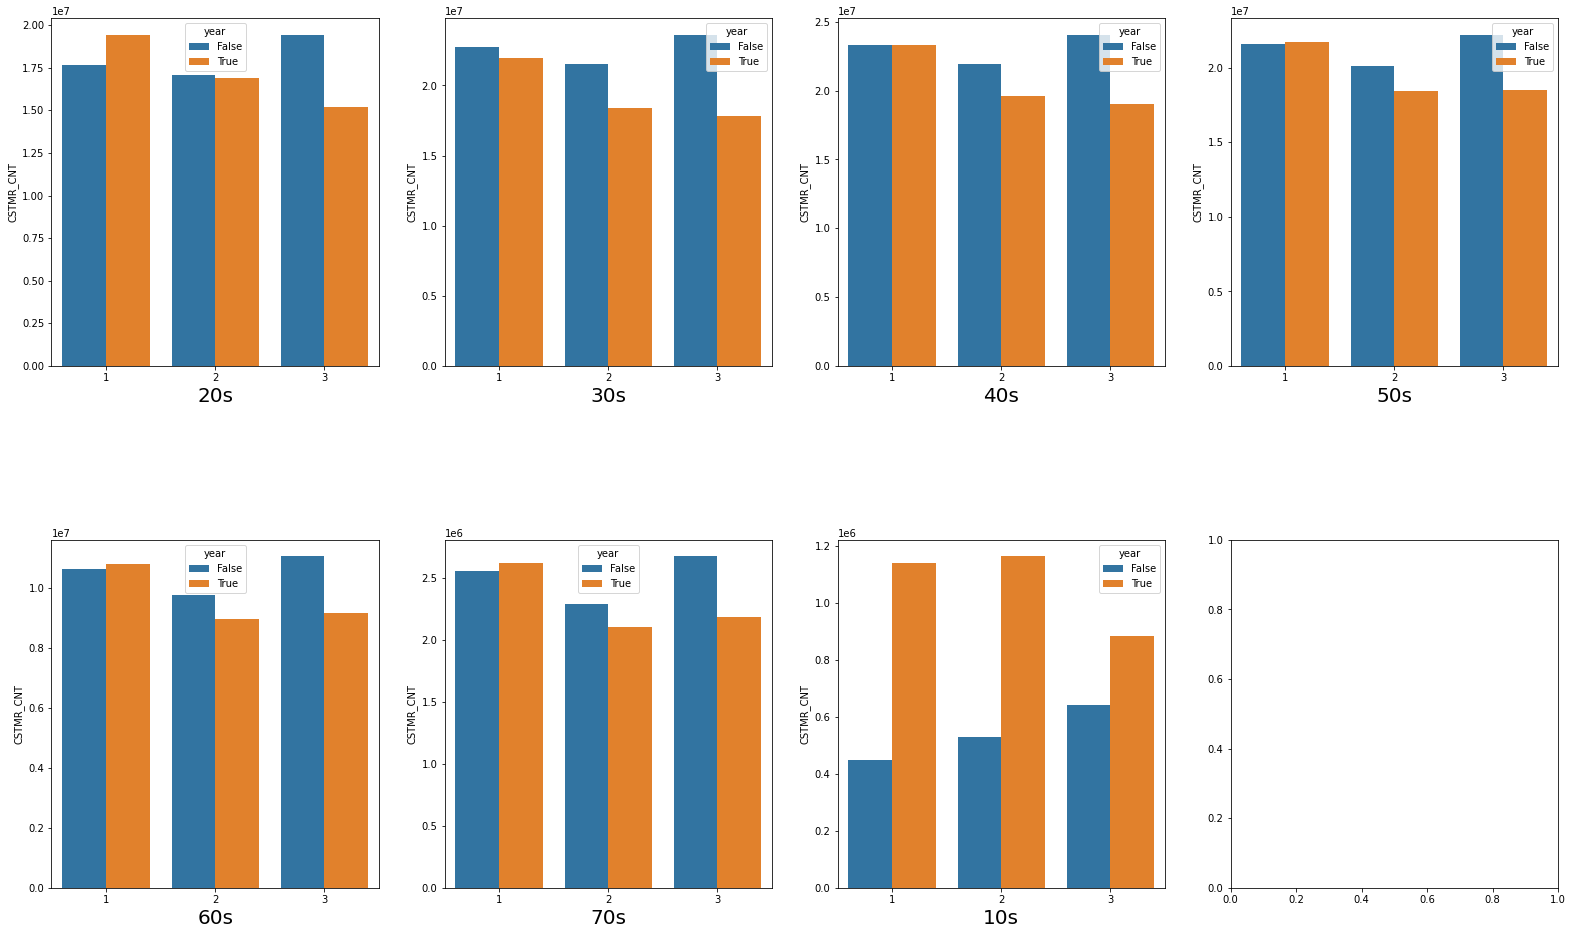

In [ ]:
# in perspective of CSTMR_CNT
plt.figure()
fig, ax = plt.subplots(2, 4, figsize=(27, 16))
plt.subplots_adjust(hspace=0.5)

j=0
for i in data_age['AGE'].unique():
  j += 1
  plt.subplot(2, 4, j)
  tmp = pd.DataFrame(data_age[data_age.AGE==i].groupby(['month', 'year'])['CSTMR_CNT'].sum()).reset_index()
  sns.barplot(x= 'month', y='CSTMR_CNT', hue='year', data=tmp)
  plt.xlabel(i, fontsize=20)

## 2) The amount of AMT

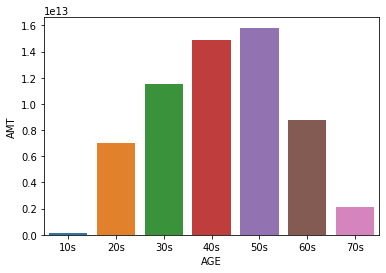

In [ ]:
age_amt = data[['AGE', 'AMT']].groupby('AGE').sum().reset_index(drop=False)
sns.barplot(age_amt['AGE'], age_amt['AMT'])

But, 50s spends most.

<Figure size 432x288 with 0 Axes>

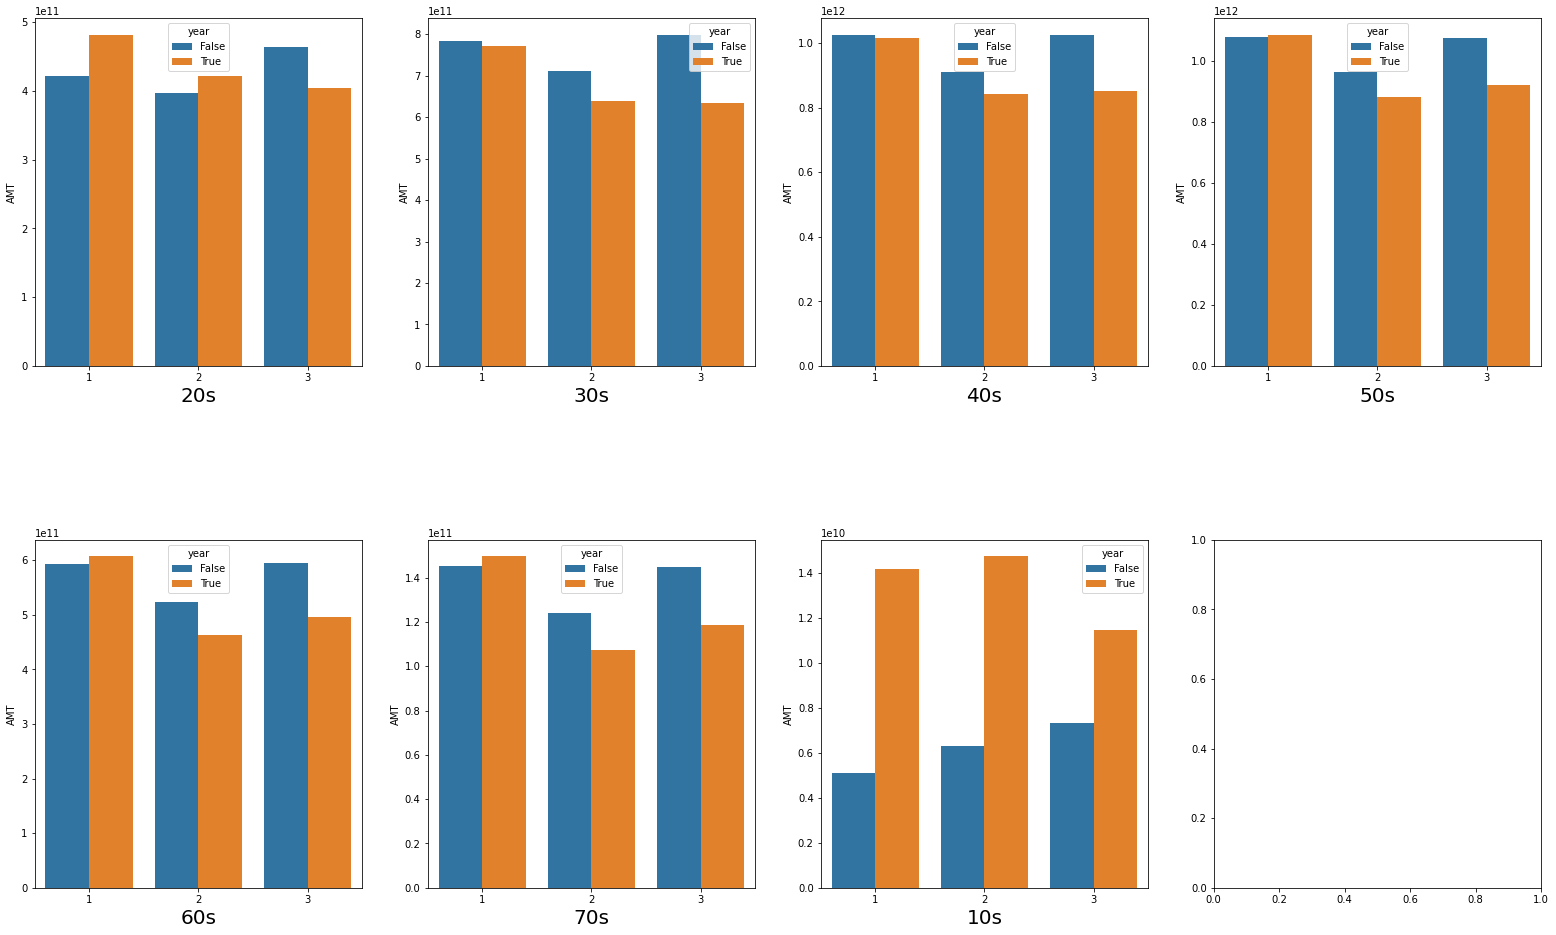

In [ ]:
# in perspective of AMT
plt.figure()
fig, ax = plt.subplots(2, 4, figsize=(27, 16))
plt.subplots_adjust(hspace=0.5)

j=0
for i in data_age['AGE'].unique():
  j += 1
  plt.subplot(2, 4, j)
  tmp = pd.DataFrame(data_age[data_age.AGE==i].groupby(['month', 'year'])['AMT'].sum()).reset_index()
  sns.barplot(x= 'month', y='AMT', hue='year', data=tmp)
  plt.xlabel(i, fontsize=20)
#Similar with CSTMR_CNT

In [ ]:
data.groupby(['CARD_SIDO_NM', 'AGE']).count()

REG_YYMM  CARD_CCG_NM  STD_CLSS_NM  ...  CSTMR_CNT     AMT     CNT
CARD_SIDO_NM AGE                                      ...                           
강원           10s      7064         7064         7064  ...       7064    7064    7064
             20s    251782       251782       251782  ...     251782  251782  251782
             30s    250790       250790       250790  ...     250790  250790  250790
             40s    304945       304945       304945  ...     304945  304945  304945
             50s    250304       250304       250304  ...     250304  250304  250304
...                    ...          ...          ...  ...        ...     ...     ...
충북           30s    175382       175382       175382  ...     175382  175382  175382
             40s    204769       204769       204769  ...     204769  204769  204769
             50s    177771       177771       177771  ...     177771  177771  177771
             60s    102709       102709       102709  ...     102709  102709  102709
             70s     24020        24020        24020  ...      24020   24020   24020

[119 rows x 10 columns]

In [ ]:
data.groupby(['CARD_SIDO_NM', 'AGE']).sum()

REG_YYMM  SEX_CTGO_CD  ...           AMT       CNT
CARD_SIDO_NM AGE                            ...                        
강원           10s   1426434292        10129  ...    2250938209    353497
             20s  50840504976       337654  ...  151375950129  12974401
             30s  50640365965       357408  ...  237249571254  11558837
             40s  61575465240       422843  ...  393332733020  15380124
             50s  50542043977       345462  ...  464627966950  14859205
...                       ...          ...  ...           ...       ...
충북           30s  35413645051       238302  ...  245066519926  12950055
             40s  41347518398       273778  ...  363657964538  15135836
             50s  35895950325       239698  ...  434512135842  14351040
             60s  20739216160       135321  ...  249179559031   6962549
             70s   4850162038        32254  ...   53590148546   1465750

[119 rows x 6 columns]

In [ ]:
data.groupby(['CARD_SIDO_NM', 'AGE']).mean().reset_index(drop=False)

,CARD_SIDO_NM,AGE,REG_YYMM,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,강원,10s,201930.109287,1.433890,1.000000,24.190119,3.186492e+05,50.042044
1,강원,20s,201922.714793,1.341057,1.089399,25.062352,6.012183e+05,51.530296
2,강원,30s,201923.385960,1.425129,1.937569,26.220089,9.460089e+05,46.089705
3,강원,40s,201923.183656,1.386621,3.010294,27.996494,1.289848e+06,50.435731
4,강원,50s,201922.637980,1.380170,3.982793,34.006400,1.856255e+06,59.364633
...,...,...,...,...,...,...,...,...
114,충북,30s,201922.917124,1.358760,1.921725,38.758510,1.397330e+06,73.839134
115,충북,40s,201922.744156,1.337009,3.081160,39.353926,1.775942e+06,73.916638
116,충북,50s,201922.418870,1.348353,3.984114,45.562133,2.444224e+06,80.727678
117,충북,60s,201922.092124,1.317518,5.000000,39.122044,2.426073e+06,67.789084


In [ ]:
print(data['CARD_SIDO_NM'].unique())
len(data['CARD_SIDO_NM'].unique())

['강원' '경기' '경남' '경북' '광주' '대구' '대전' '부산' '서울' '세종' '울산' '인천' '전남' '전북'
 '제주' '충남' '충북']


17

In [ ]:
print(data['STD_CLSS_NM'].unique())
len(data['STD_CLSS_NM'].unique())

['건강보조식품 소매업' '골프장 운영업' '과실 및 채소 소매업' '관광 민예품 및 선물용품 소매업'
 '그외 기타 스포츠시설 운영업' '그외 기타 종합 소매업' '기타 대형 종합 소매업' '기타 외국식 음식점업' '기타 주점업'
 '기타음식료품위주종합소매업' '마사지업' '비알콜 음료점업' '빵 및 과자류 소매업' '서양식 음식점업' '수산물 소매업'
 '슈퍼마켓' '스포츠 및 레크레이션 용품 임대업' '여관업' '욕탕업' '육류 소매업' '일반유흥 주점업' '일식 음식점업'
 '전시 및 행사 대행업' '중식 음식점업' '차량용 가스 충전업' '차량용 주유소 운영업' '체인화 편의점'
 '피자 햄버거 샌드위치 및 유사 음식점업' '한식 음식점업' '호텔업' '화장품 및 방향제 소매업' '휴양콘도 운영업' '여행사업'
 '자동차 임대업' '면세점' '버스 운송업' '택시 운송업' '기타 수상오락 서비스업' '내항 여객 운송업'
 '그외 기타 분류안된 오락관련 서비스업' '정기 항공 운송업']


41

In [ ]:
17*41 # 697
17 * 41 * 15

10455

<Figure size 432x288 with 0 Axes>

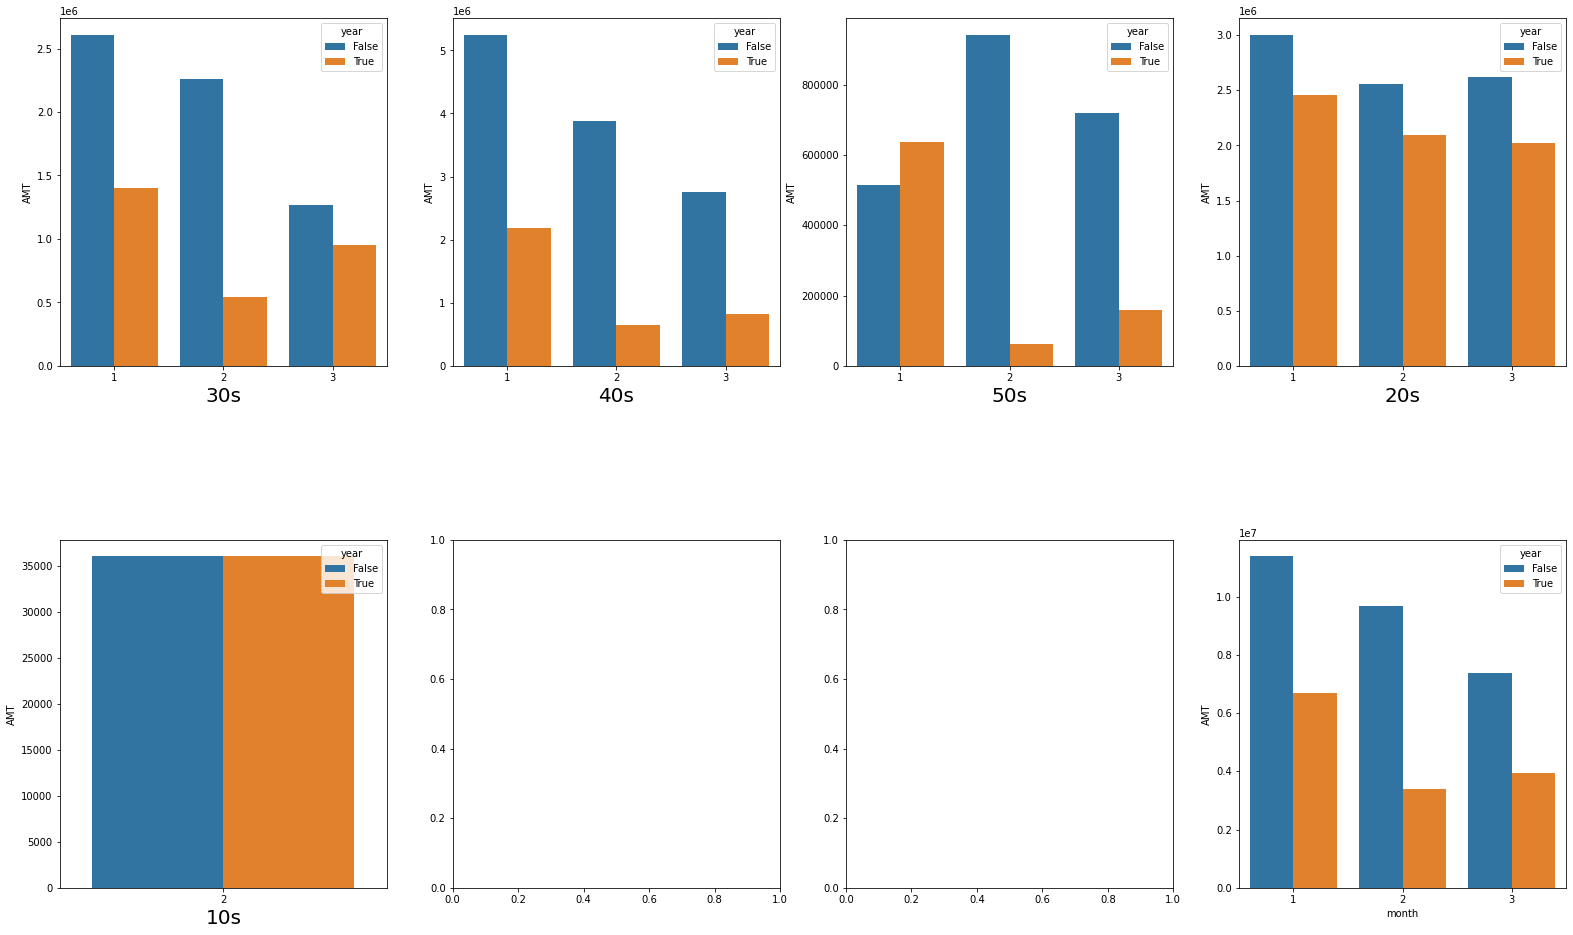

In [ ]:
# Year, Month, SIDO, CLSS, AGE, AMT
# Location and Service
data_there = data_123.loc[(data_123.CARD_SIDO_NM=='서울') & (data_123.STD_CLSS_NM=='기타 수상오락 서비스업'), ['AGE', 'month', 'year', 'AMT']]

plt.figure()
fig, ax = plt.subplots(2, 4, figsize=(27, 16))
plt.subplots_adjust(hspace=0.5)

j=0
for i in data_there['AGE'].unique():
  j += 1
  plt.subplot(2, 4, j)
  tmp = pd.DataFrame(data_there[data_there.AGE==i].groupby(['month', 'year'])['AMT'].sum()).reset_index()
  sns.barplot(x= 'month', y='AMT', hue='year', data=tmp)
  plt.xlabel(i, fontsize=20)

plt.subplot(2,4,8)
tmp = pd.DataFrame(data_there.groupby(['month', 'year'])['AMT'].sum()).reset_index()
sns.barplot(x= 'month', y='AMT', hue='year', data=tmp)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<Figure size 432x288 with 0 Axes>

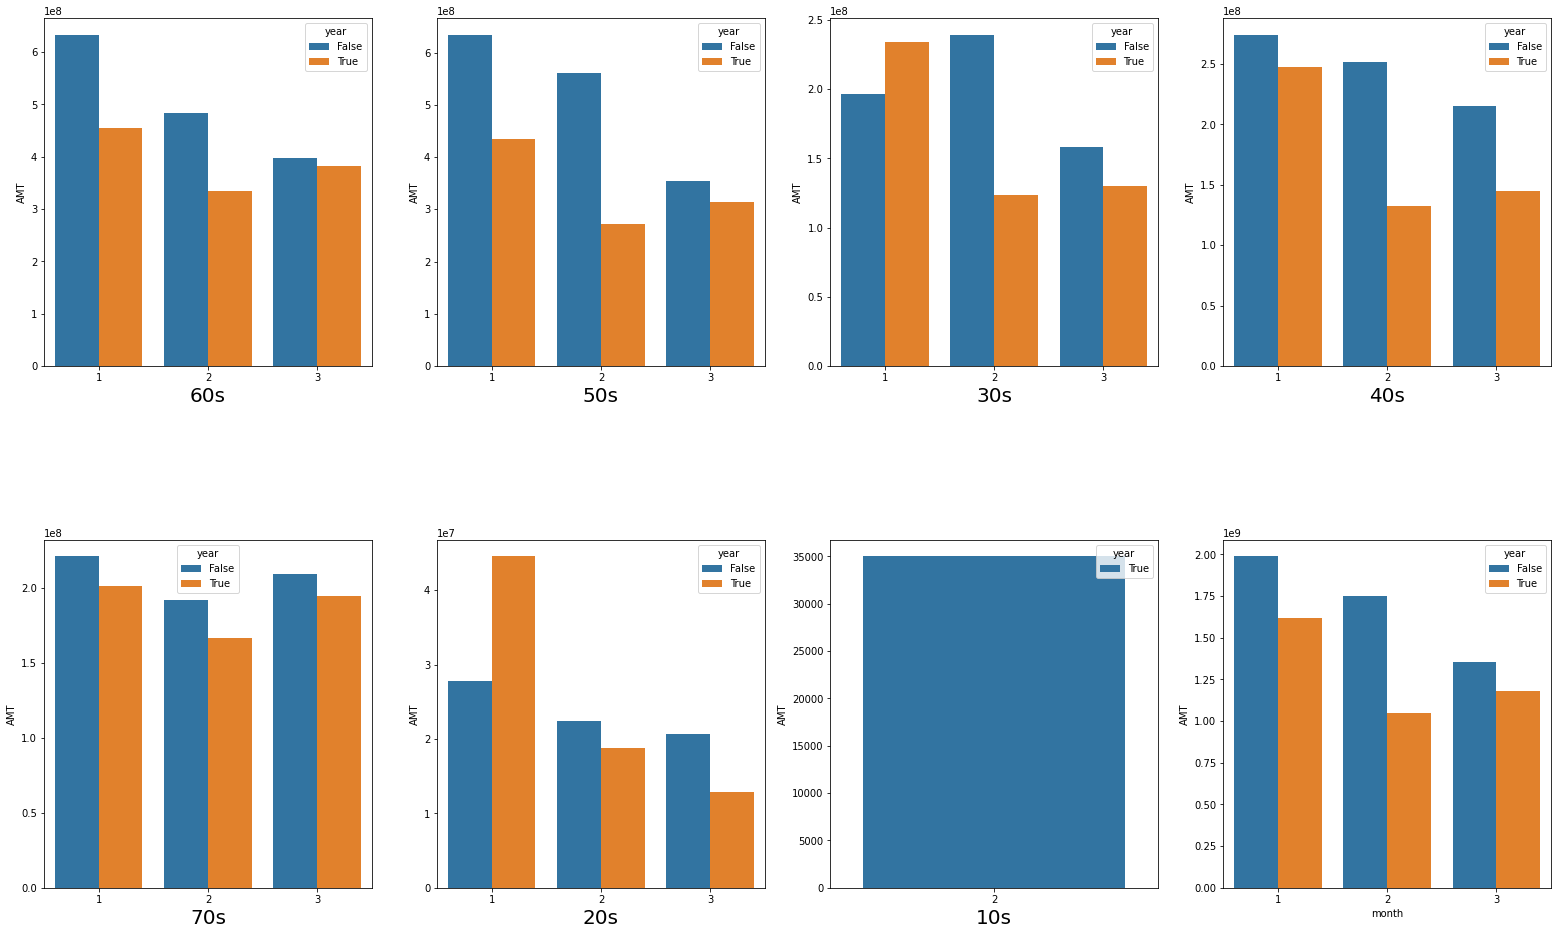

In [ ]:
# Year, Month, SIDO, CLSS, AGE, AMT
# Location and Service
data_there = data_123.loc[(data_123.CARD_SIDO_NM=='서울') & (data_123.STD_CLSS_NM=='건강보조식품 소매업'), ['AGE', 'month', 'year', 'AMT']]

plt.figure()
fig, ax = plt.subplots(2, 4, figsize=(27, 16))
plt.subplots_adjust(hspace=0.5)

j=0
for i in data_there['AGE'].unique():
  j += 1
  plt.subplot(2, 4, j)
  tmp = pd.DataFrame(data_there[data_there.AGE==i].groupby(['month', 'year'])['AMT'].sum()).reset_index()
  sns.barplot(x= 'month', y='AMT', hue='year', data=tmp)
  plt.xlabel(i, fontsize=20)

  plt.subplot(2,4,8)
tmp = pd.DataFrame(data_there.groupby(['month', 'year'])['AMT'].sum()).reset_index()
sns.barplot(x= 'month', y='AMT', hue='year', data=tmp)

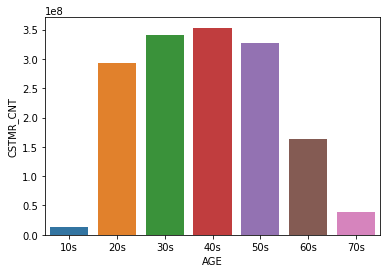

In [ ]:
age_amt = data[['AGE', 'CSTMR_CNT']].groupby('AGE').sum().reset_index(drop=False)
sns.barplot(age_amt['AGE'], age_amt['CSTMR_CNT'])

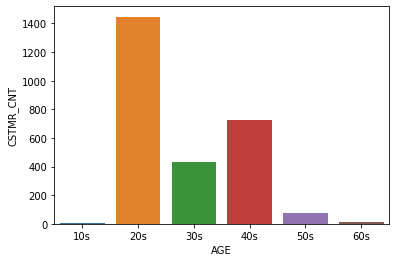

In [ ]:
data_age = data.loc[(data.CARD_SIDO_NM=='강원') & (data.STD_CLSS_NM=='기타 수상오락 서비스업'), ['AGE', 'CSTMR_CNT']]

tmp = pd.DataFrame(data_age.groupby(['AGE']).sum()).reset_index()
sns.barplot(x= 'AGE', y='CSTMR_CNT', data=tmp)

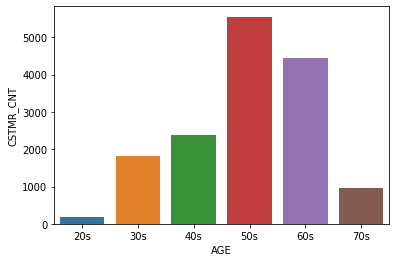

In [ ]:
data_age = data.loc[(data.CARD_SIDO_NM=='강원') & (data.STD_CLSS_NM=='건강보조식품 소매업'), ['AGE', 'CSTMR_CNT']]

tmp = pd.DataFrame(data_age.groupby(['AGE']).sum()).reset_index()
sns.barplot(x= 'AGE', y='CSTMR_CNT', data=tmp)